In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
ticker = "BABA"
period = "50y"
stock = yf.Ticker(ticker.upper())
history = stock.history(period=period)

In [5]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-19 00:00:00-04:00,91.47,98.38,88.76,92.64,271879400,0.00,0.00
2014-09-22 00:00:00-04:00,91.47,91.72,88.31,88.70,66657800,0.00,0.00
2014-09-23 00:00:00-04:00,87.76,89.28,85.47,86.01,39009800,0.00,0.00
2014-09-24 00:00:00-04:00,87.30,89.37,86.06,89.37,32088000,0.00,0.00
2014-09-25 00:00:00-04:00,89.88,90.29,87.33,87.74,28598000,0.00,0.00
...,...,...,...,...,...,...,...
2024-03-20 00:00:00-04:00,73.55,74.33,73.30,74.18,11123200,0.00,0.00
2024-03-21 00:00:00-04:00,74.30,74.74,73.77,73.83,11860700,0.00,0.00
2024-03-22 00:00:00-04:00,72.48,72.62,72.04,72.13,12756000,0.00,0.00


In [6]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"2,395.00","2,395.00","2,395.00","2,395.00","2,395.00","2,395.00","2,395.00"
mean,138.05,139.75,136.09,137.93,"19,120,174.88",0.00,0.00
std,58.72,59.24,57.96,58.64,"13,057,754.89",0.02,0.00
min,56.54,57.87,56.44,56.63,"3,775,300.00",0.00,0.00
25%,85.73,86.74,84.51,85.59,"11,978,800.00",0.00,0.00
50%,117.05,119.28,115.05,118.03,"16,221,100.00",0.00,0.00
75%,180.80,182.67,178.15,180.27,"22,005,250.00",0.00,0.00
max,309.34,315.08,304.81,312.93,"271,879,400.00",1.00,0.00


In [7]:
stock.cash_flow

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,"165,400,000,000.00","89,435,000,000.00","188,601,000,000.00","135,221,000,000.00"
Repurchase Of Capital Stock,"-74,746,000,000.00","-61,225,000,000.00","-773,000,000.00",0.00
Repayment Of Debt,"-11,448,000,000.00","-16,713,000,000.00","-7,061,000,000.00","-31,741,000,000.00"
Issuance Of Debt,"22,790,000,000.00","9,427,000,000.00","38,410,000,000.00","15,719,000,000.00"
Issuance Of Capital Stock,"11,000,000.00","109,000,000.00","175,000,000.00","91,506,000,000.00"
...,...,...,...,...
Earnings Losses From Equity Investments,"8,063,000,000.00","-14,344,000,000.00","-6,984,000,000.00","-65,828,000,000.00"
Gain Loss On Investment Securities,"14,911,000,000.00","20,481,000,000.00","-66,689,000,000.00","2,901,000,000.00"
Gain Loss On Sale Of PPE,"-163,000,000.00","132,000,000.00","75,000,000.00","-24,000,000.00"
Gain Loss On Sale Of Business,"58,000,000.00","-1,131,000,000.00","-1,027,000,000.00","-10,043,000,000.00"


In [8]:
stock.balance_sheet

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Ordinary Shares Number,"20,526,017,712.00","21,357,323,112.00","21,699,031,448.00","21,491,994,944.00"
Share Issued,"20,526,017,712.00","21,357,323,112.00","21,699,031,448.00","21,491,994,944.00"
Total Debt,"195,569,000,000.00","176,597,000,000.00","181,439,000,000.00","147,287,000,000.00"
Tangible Book Value,"665,748,000,000.00","607,242,000,000.00","564,517,000,000.00","405,652,000,000.00"
Invested Capital,"1,151,011,000,000.00","1,089,823,000,000.00","1,086,623,000,000.00","880,831,000,000.00"
...,...,...,...,...
Accrued Interest Receivable,"5,471,000,000.00","2,449,000,000.00","2,110,000,000.00","984,000,000.00"
Accounts Receivable,"32,134,000,000.00","32,813,000,000.00","27,076,000,000.00","19,786,000,000.00"
Cash Cash Equivalents And Short Term Investments,"524,470,000,000.00","455,085,000,000.00","483,445,000,000.00","363,215,000,000.00"
Other Short Term Investments,"331,384,000,000.00","265,187,000,000.00","162,183,000,000.00","32,712,000,000.00"


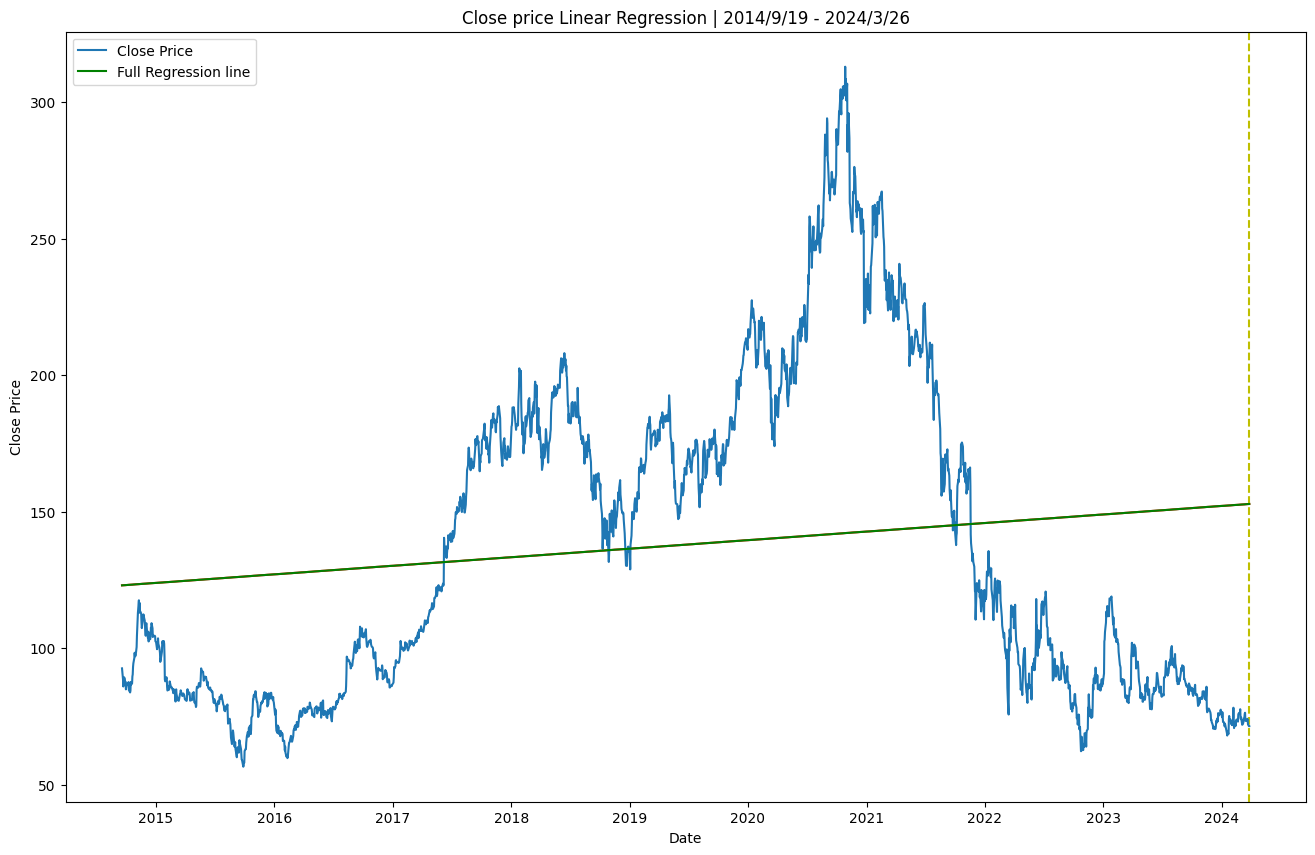

In [9]:
plotting.plot_regression_line(history, reg_line_count=1, log_scale=False)

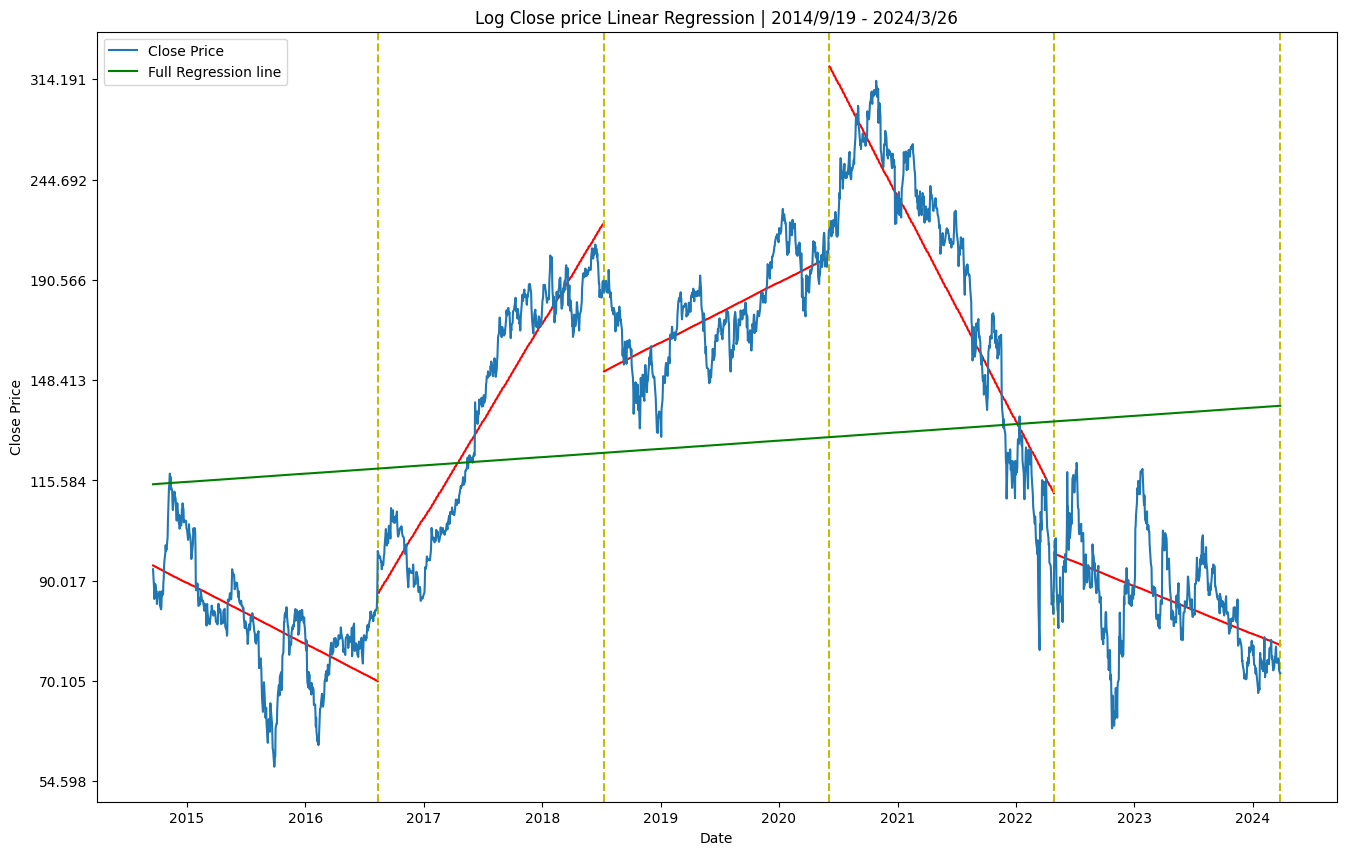

In [10]:
plotting.plot_regression_line(history, reg_line_count=5, log_scale=True)

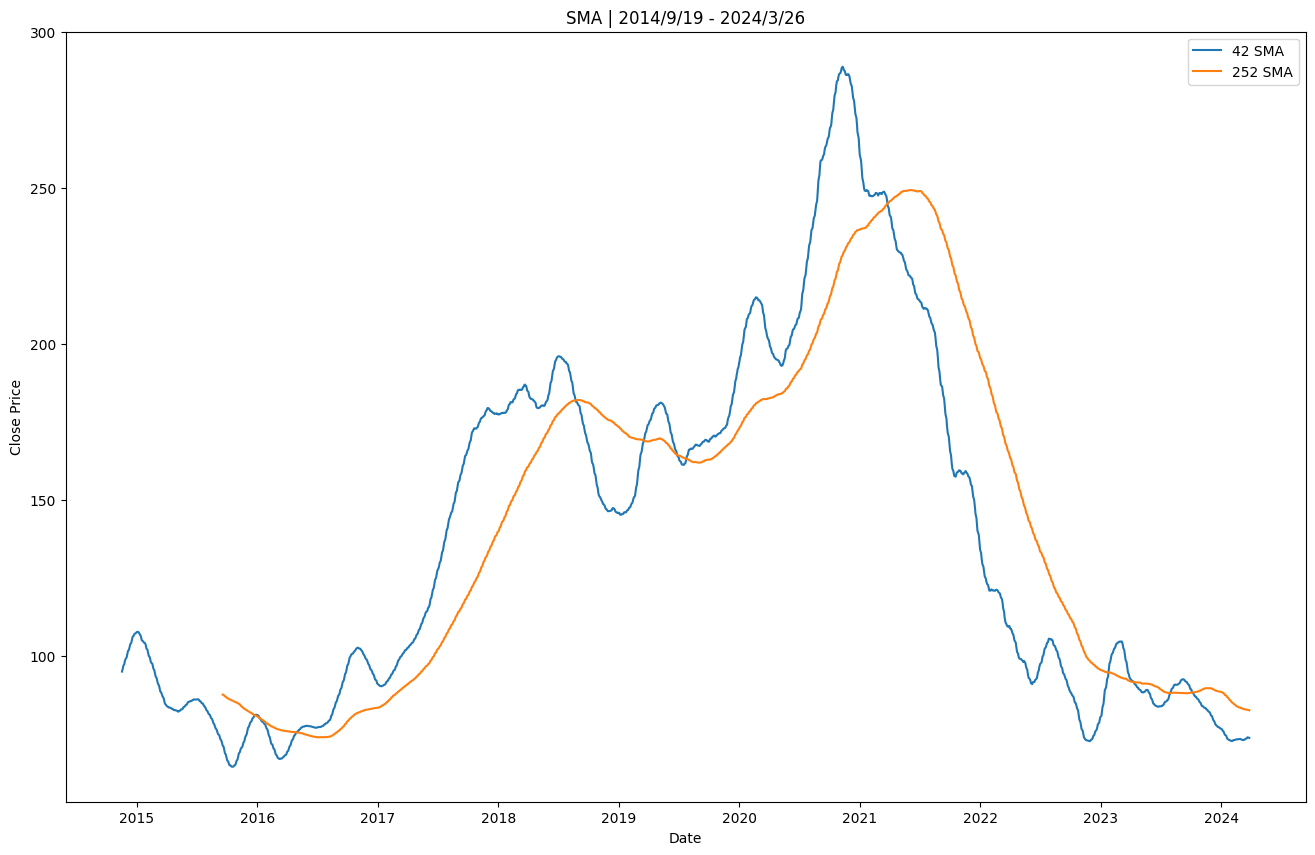

In [11]:
plotting.plot_sma(history, [42, 252], hide_data=True)